Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2227
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0194
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0203
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0192
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


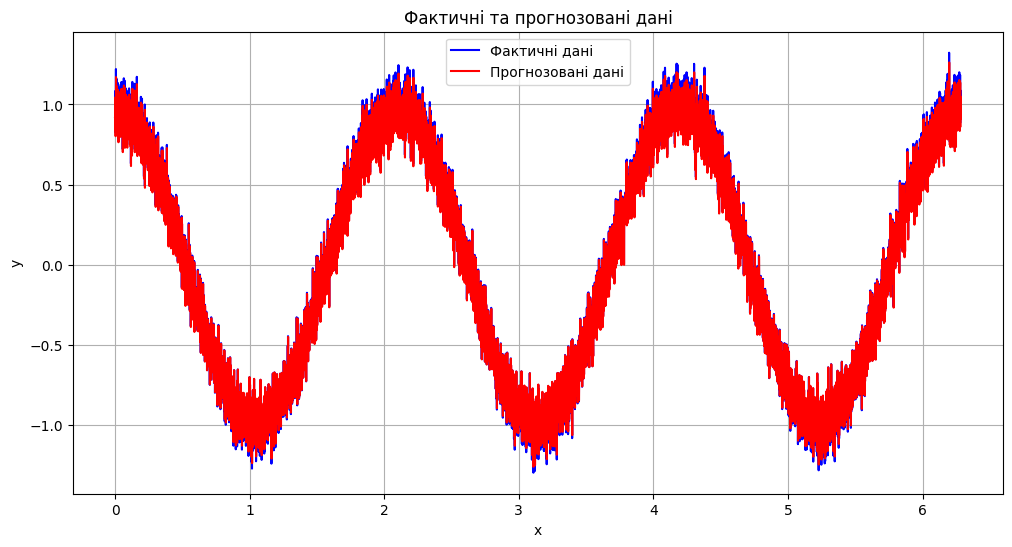

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense


N = 10000
x = np.linspace(0, 2*np.pi, N)
data = np.cos(3*x) + 0.1*np.random.randn(N)


X = data[:-1]
y = data[1:]


model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=False), input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)


model.fit(X, y, epochs=10, batch_size=32)


predictions = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(x[1:], y, label='Фактичні дані', color='blue')
plt.plot(x[1:], predictions, label='Прогнозовані дані', color='red')
plt.title('Фактичні та прогнозовані дані')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()